# **Phase 2:**

## **Phase Introduction**

This notebook documents the Exploratory Data Analysis (EDA) and data cleaning process for the integrated dataset. The primary objectives of this phase are:

1. **Initial Data Inspection** – Understanding the structure, completeness, and potential issues in the dataset.  
2. **Exploratory Data Analysis (EDA)** – Identifying patterns, trends, and anomalies through statistical summaries and visualizations.  
3. **Data Cleaning & Preprocessing** – Handling missing values, duplicates, and irrelevant features, as well as normalizing or transforming data where necessary.  
4. **Comparison of Primary and Secondary Data** – Evaluating similarities, differences, and potential biases between the two sources.  

Each step is carefully documented, including the rationale behind data processing decisions, challenges encountered, and key findings. The insights gained will help guide further analysis and hypothesis development.  

In [ ]:
import pandas as pd

df = pd.read_csv("Datasets/integrated.csv")  
print(df.info())  
print(df.head())  
print(df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disaster Group            32319 non-null  object 
 1   Disaster Subgroup         32319 non-null  object 
 2   Disaster Type             32319 non-null  object 
 3   ISO                       32309 non-null  object 
 4   Latitude                  4648 non-null   object 
 5   Longitude                 4651 non-null   object 
 6   Start Year                32319 non-null  int64  
 7   Start Month               31864 non-null  float64
 8   Start Day                 27129 non-null  float64
 9   End Year                  32319 non-null  int64  
 10  End Month                 31449 non-null  float64
 11  End Day                   27264 non-null  float64
 12  Total Deaths              24343 non-null  float64
 13  No. Injured               9848 non-null   float64
 14  No. Af

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv("Datasets/integrated.csv")  # Modify path if needed

# Initial inspection
print("Dataset Info:\n")
print(df.info())

print("\nFirst Five Rows:\n")
print(df.head())

print("\nSummary Statistics:\n")
print(df.describe())

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nDuplicate Records:", df.duplicated().sum())

print("\nData Types:\n")
print(df.dtypes)

print("\nFeature Relevance Check:\n")
print(df.nunique())  # Shows unique values per column to check for low-variance features


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disaster Group            32319 non-null  object 
 1   Disaster Subgroup         32319 non-null  object 
 2   Disaster Type             32319 non-null  object 
 3   ISO                       32309 non-null  object 
 4   Latitude                  4648 non-null   object 
 5   Longitude                 4651 non-null   object 
 6   Start Year                32319 non-null  int64  
 7   Start Month               31864 non-null  float64
 8   Start Day                 27129 non-null  float64
 9   End Year                  32319 non-null  int64  
 10  End Month                 31449 non-null  float64
 11  End Day                   27264 non-null  float64
 12  Total Deaths              24343 non-null  float64
 13  No. Injured               9848 non-null   floa

## Potential issues

In [13]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Datasets/integrated.csv")

# Select specific columns and drop rows with null values
selected_df = df[['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'ISO', 'Start Year', 'Start Month', 'End Year', 'End Month']].dropna()

# Save the cleaned DataFrame to a new CSV file
selected_df.to_csv("Datasets/Regions.csv", index=False)


In [14]:
import pandas as pd

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Find duplicate rows for inspection (optional, remove if not needed)
duplicates = regions_df[regions_df.duplicated()]
print(duplicates)

# Remove duplicate rows
regions_df = regions_df.drop_duplicates()

# Save the cleaned DataFrame to the same CSV file, effectively overwriting the original data
regions_df.to_csv("Datasets/Regions.csv", index=False)


      Disaster Group       Disaster Subgroup  \
6            Natural             Geophysical   
7            Natural             Geophysical   
9            Natural             Geophysical   
15           Natural          Climatological   
19           Natural          Climatological   
...              ...                     ...   
31291        Natural          Meteorological   
31310  Technological               Transport   
31341  Technological               Transport   
31348  Technological  Miscellaneous accident   
31354  Technological               Transport   

                          Disaster Type  ISO  Start Year  Start Month  \
6                            Earthquake  ETH        2025          2.0   
7                            Earthquake  IDN        2025          2.0   
9                            Earthquake  GRC        2025          2.0   
15                             Wildfire  AUS        2025          2.0   
19                             Wildfire  CAF        2025  

In [15]:
import pandas as pd

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Print column names to check the correct column identifiers
print("Columns in the DataFrame:", regions_df.columns)

# Remove duplicate rows for inspection
regions_df = regions_df.drop_duplicates()

# Assuming the column names have been verified and corrected if necessary
try:
    # Aggregate the data to count occurrences of each disaster type in each region
    disaster_counts = regions_df.groupby(['ISO', 'Disaster Group']).size().reset_index(name='Counts')
    
    # Sort the results to find the most frequent disaster type per region
    sorted_disasters = disaster_counts.sort_values(by=['ISO', 'Counts'], ascending=[True, False])
    
    # Extract the most frequent disaster type for each region
    most_frequent_disasters = sorted_disasters.drop_duplicates(subset='ISO')

    # Save the result to a new CSV file
    most_frequent_disasters.to_csv('Datasets/Most_Frequent_Disasters.csv', index=False)

    # Optionally, print the result to see what it looks like
    print(most_frequent_disasters)
except KeyError as e:
    print(f"KeyError: Check if the column name {e} exists in your DataFrame.")


Columns in the DataFrame: Index(['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'ISO',
       'Start Year', 'Start Month', 'End Year', 'End Month'],
      dtype='object')
     ISO Disaster Group  Counts
0    AFG        Natural     217
2    AGO        Natural      70
4    AIA        Natural      13
5    ALB        Natural      49
7    ANT        Natural       4
..   ...            ...     ...
401  YMN        Natural       6
402  YUG        Natural      21
403  ZAF        Natural     123
405  ZMB        Natural      50
407  ZWE        Natural      52

[233 rows x 3 columns]


In [16]:
pip install matplotlib seaborn pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


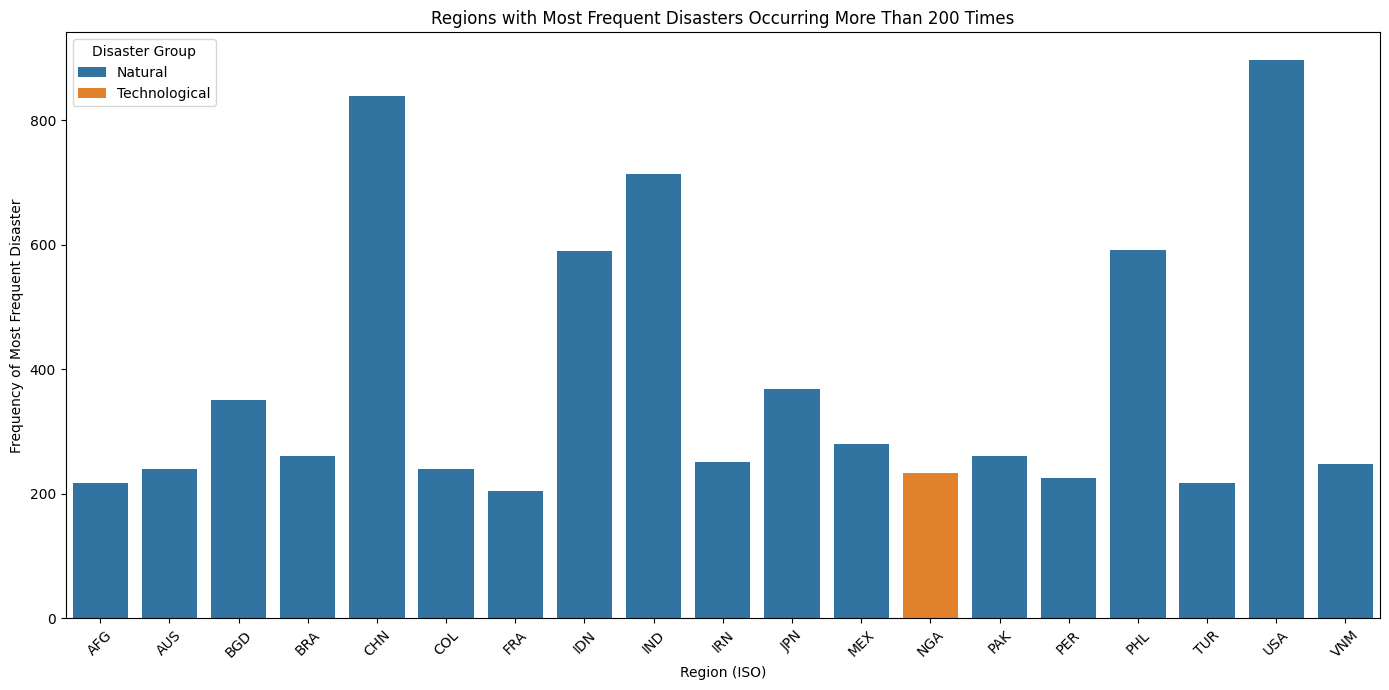

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of each disaster type in each region
disaster_counts = regions_df.groupby(['ISO', 'Disaster Group']).size().reset_index(name='Counts')

# Sort the results to find the most frequent disaster type per region
sorted_disasters = disaster_counts.sort_values(by=['ISO', 'Counts'], ascending=[True, False])

# Find the most frequent disaster type for each region
most_frequent_disasters = sorted_disasters.drop_duplicates(subset='ISO')

# Filter to include only entries with Counts over 200
high_impact_disasters = most_frequent_disasters[most_frequent_disasters['Counts'] > 200]

# Visualization: Create a bar chart
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(data=high_impact_disasters, x='ISO', y='Counts', hue='Disaster Group', dodge=False)
plt.title('Regions with Most Frequent Disasters Occurring More Than 200 Times')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Region (ISO)')  # X-axis label
plt.ylabel('Frequency of Most Frequent Disaster')  # Y-axis label
plt.legend(title='Disaster Group')  # Add legend with a title
plt.tight_layout()  # Adjust subplots to give some padding

# Save the plot as a PNG file
plt.savefig('EDA/High_Impact_Disasters.png')

# Show the plot
plt.show()


/tmp/ipykernel_6168/2688082186.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_subgroup_frequency, x='Disaster Subgroup', y='Counts', palette='viridis')


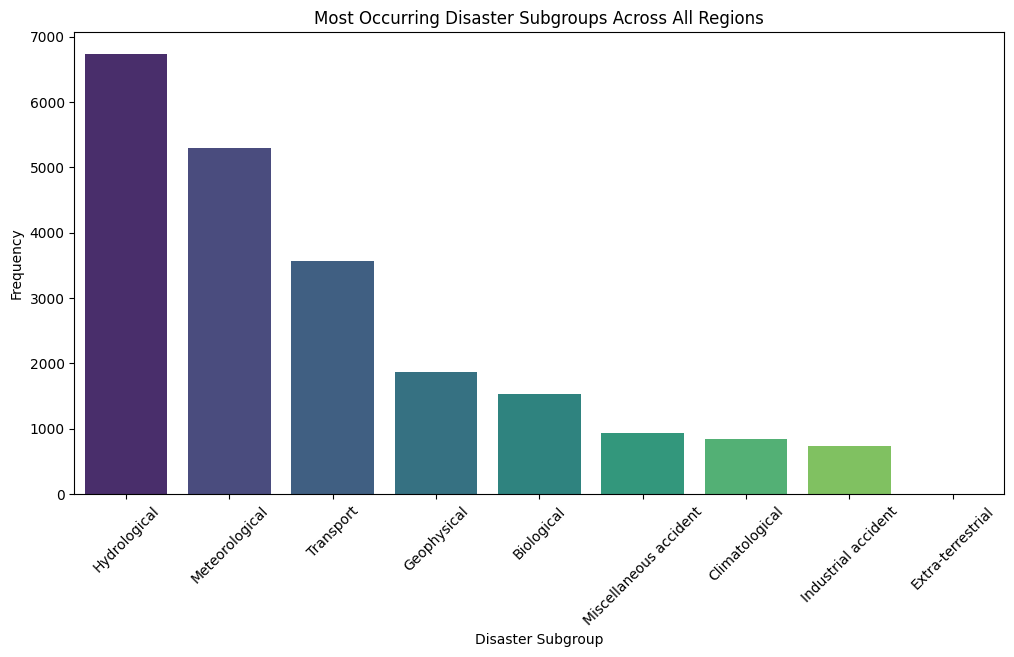

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of each disaster subgroup across all regions
disaster_subgroup_frequency = regions_df.groupby('Disaster Subgroup').size().reset_index(name='Counts')

# Sort the results to find the most frequent disaster subgroups
sorted_subgroup_frequency = disaster_subgroup_frequency.sort_values(by='Counts', ascending=False)

# Visualization: Create a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=sorted_subgroup_frequency, x='Disaster Subgroup', y='Counts', palette='viridis')
plt.title('Most Occurring Disaster Subgroups Across All Regions')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Disaster Subgroup')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

# Save the plot as a PNG file
plt.savefig('EDA/Most_Occurring_Disaster_Subgroups.png')

# Show the plot
plt.show()


/tmp/ipykernel_6168/3902135146.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_type_frequency, x='Disaster Type', y='Counts', palette='viridis')


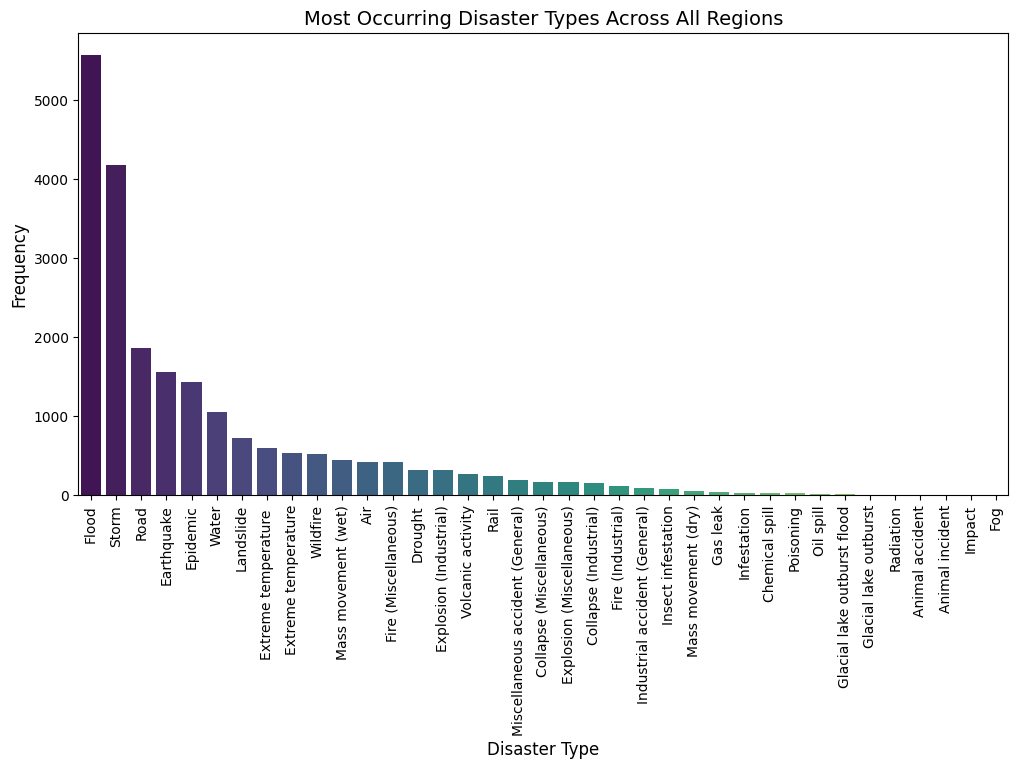

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of each disaster type across all regions
disaster_type_frequency = regions_df.groupby('Disaster Type').size().reset_index(name='Counts')

# Sort the results to find the most frequent disaster types
sorted_type_frequency = disaster_type_frequency.sort_values(by='Counts', ascending=False)

# Visualization: Create a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=sorted_type_frequency, x='Disaster Type', y='Counts', palette='viridis')

# Decrease font sizes
plt.title('Most Occurring Disaster Types Across All Regions', fontsize=14)  # Smaller title font size
plt.xticks(rotation=90, fontsize=10)  # Smaller tick font size for x-axis
plt.yticks(fontsize=10)  # Smaller tick font size for y-axis
plt.xlabel('Disaster Type', fontsize=12)  # Smaller label font size for x-axis
plt.ylabel('Frequency', fontsize=12)  # Smaller label font size for y-axis

# Save the plot as a PNG file
plt.savefig('EDA/Most_Occurring_Disaster_Types.png')

# Show the plot
plt.show()


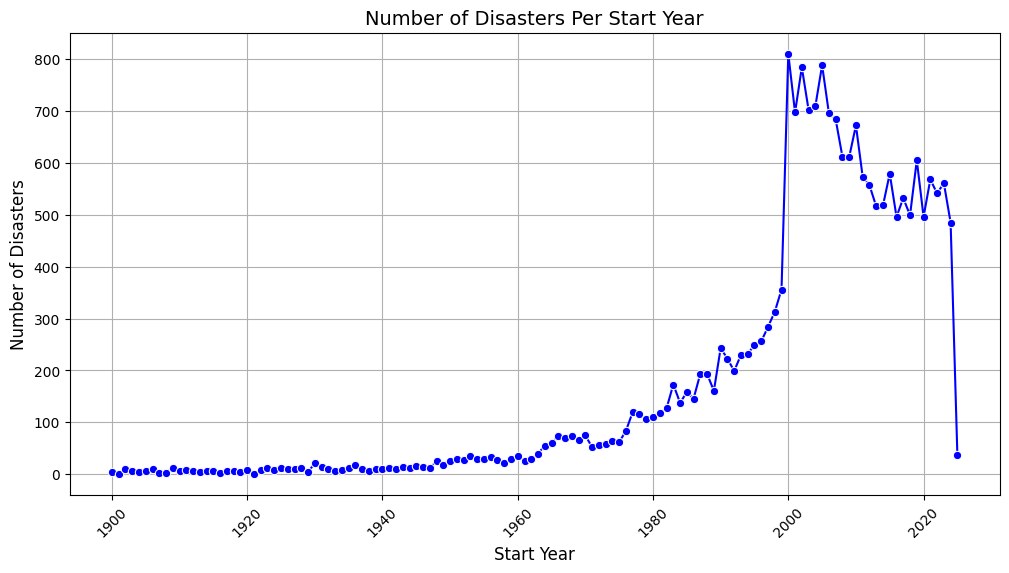

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of disasters each year using the 'Start Year' column
disaster_by_start_year = regions_df.groupby('Start Year').size().reset_index(name='Counts')

# Sort the results by year (if not already sorted)
disaster_by_start_year.sort_values('Start Year', inplace=True)

# Visualization: Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=disaster_by_start_year, x='Start Year', y='Counts', marker='o', color='b')  # 'o' marker adds dots at each data point

plt.title('Number of Disasters Per Start Year', fontsize=14)
plt.xlabel('Start Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Optionally, you can adjust grid lines for better visual comparison
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('EDA/Disaster_Frequency_By_Start_Year.png')

# Show the plot
plt.show()


emdat api / vs kaggle

What are the estimated losses associated with losses

In [21]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Datasets/integrated.csv")

# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with any null values
df = df.dropna()

# Save the cleaned data to a new CSV file
df.to_csv("Datasets/losses.csv", index=False)


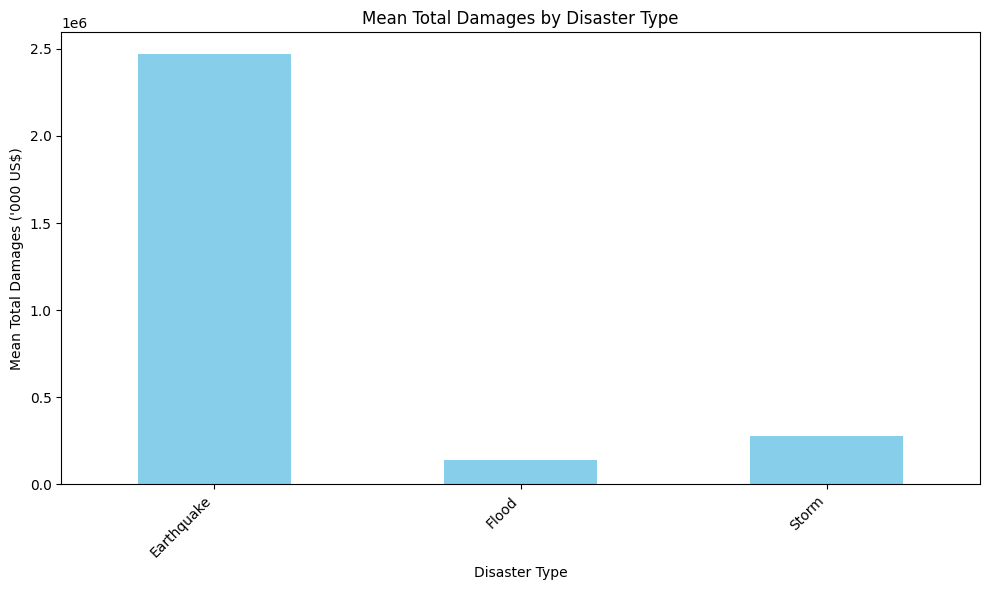

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Datasets/losses.csv")

# Group by 'Disaster Type' and calculate the mean of 'Total Damages ('000 US$)'
mean_damages = df.groupby('Disaster Type')['Total Damages (\'000 US$)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
mean_damages.plot(kind='bar', color='skyblue')
plt.title('Mean Total Damages by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Mean Total Damages (\'000 US$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('EDA/mean_total_damages.png')
plt.show()


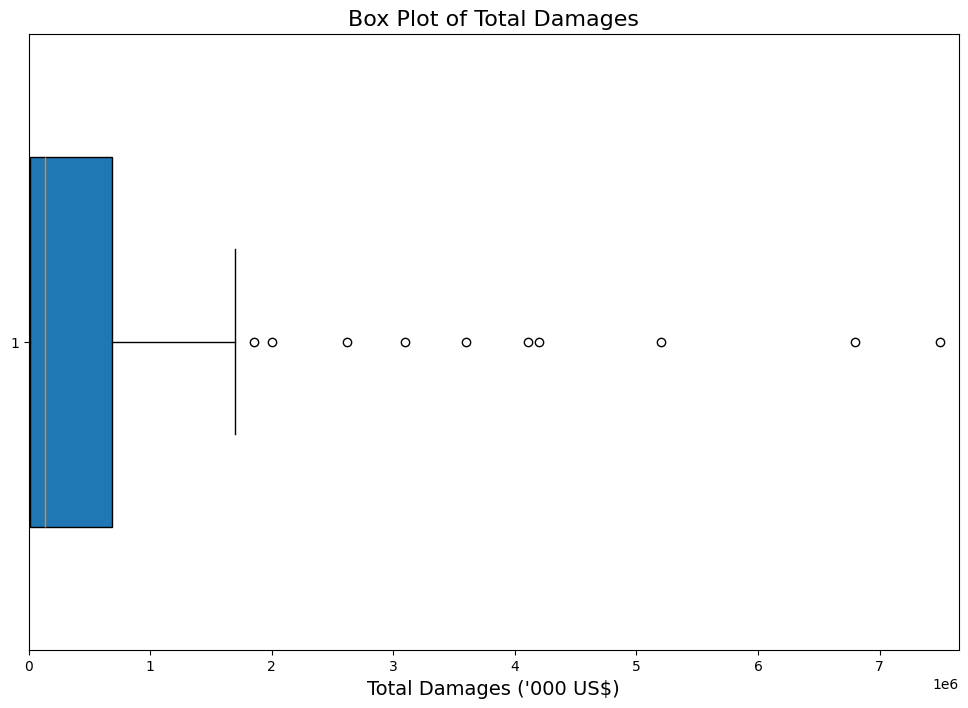

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Datasets/losses.csv")

# Plotting the box plot for 'Total Damages ('000 US$)'
plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
plt.boxplot(df['Total Damages (\'000 US$)'].dropna(), vert=False, widths=0.6, patch_artist=True)
plt.title('Box Plot of Total Damages', fontsize=16)
plt.xlabel('Total Damages (\'000 US$)', fontsize=14)

# Setting x-axis limits to improve focus on the data range
plt.xlim([0, df['Total Damages (\'000 US$)'].quantile(0.95)])  # Adjusting x-axis to exclude extreme outliers

# Save the plot with higher resolution
plt.savefig('EDA/improved_total_damages_boxplot.png', dpi=300)
plt.show()


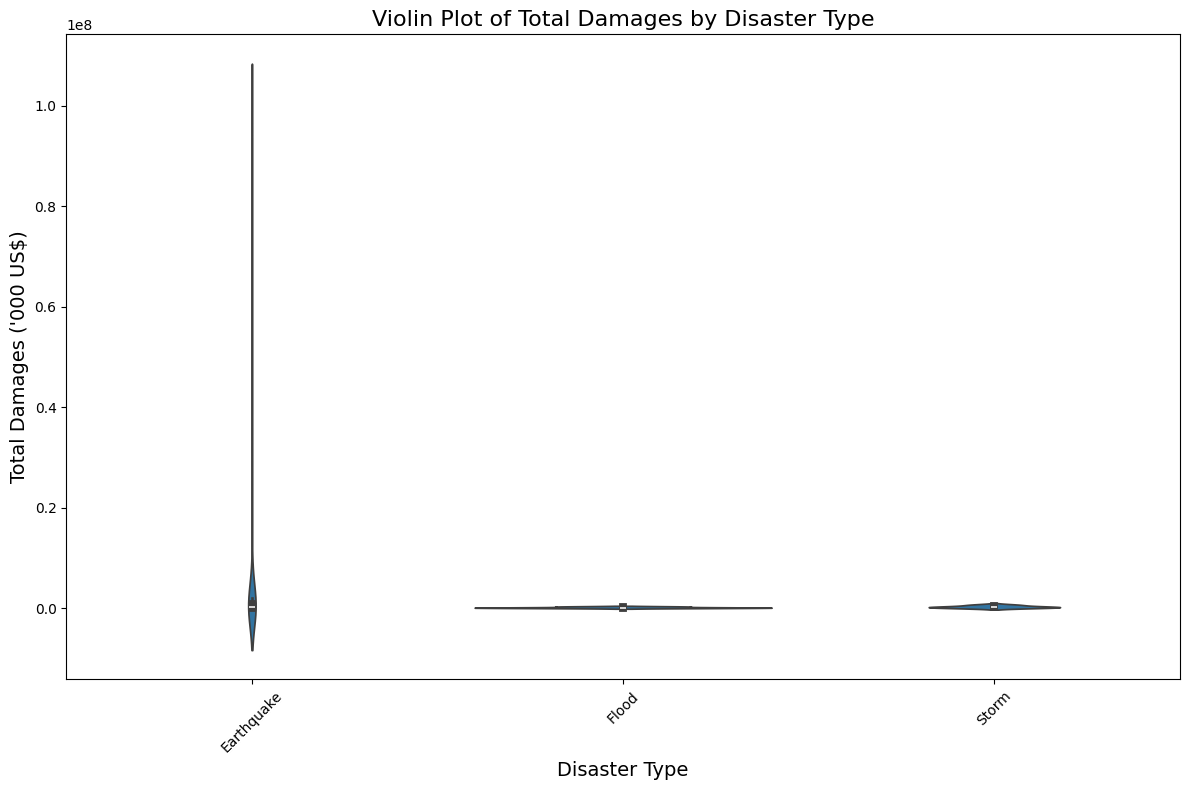

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Datasets/losses.csv")

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Disaster Type', y='Total Damages (\'000 US$)', data=df)
plt.title('Violin Plot of Total Damages by Disaster Type', fontsize=16)
plt.xlabel('Disaster Type', fontsize=14)
plt.ylabel('Total Damages (\'000 US$)', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.tight_layout()

# Save the plot
plt.savefig('EDA/violindamages_by_disaster.png', dpi=300)
plt.show()


## 4. Earthquake Risk by Region

In this analysis, we aim to explore **which regions have a greater likelihood of experiencing earthquakes**. By analyzing past earthquake occurrences, we will identify high-risk areas based on:

- **Earthquake frequency** (how often earthquakes occur in different regions).
- **Earthquake severity** (magnitude distribution across regions).
- **Human impact** (total affected population and deaths).
- **Geographic hotspots** (spatial distribution of earthquakes on a map).

### Dataset Observations:
- The dataset includes details such as latitude, longitude, magnitude, total affected population, and total deaths.

- There are missing values, particularly in latitude, longitude, and magnitude, which are essential for location-based analysis.

- The dataset contains various disaster types, so filtering for earthquakes is necessary.

Our dataset contains 32,319 entries with 20 columns, covering various disaster types, locations, and impacts. Since we are specifically interested in earthquakes, we will extract and analyze relevant earthquake-related data.

We will start by extracting relevant features from the dataset (integrated.csv). Then, we will perform EDA.

In [2]:
import pandas as pd

df4 = pd.read_csv("Datasets/integrated.csv")

### Dataset Cleaning and Feature Selection:

To focus on earthquake-related insights, we will be selecting the following features:

- **Latitude & Longitude** (for location-based analysis)
- **ISO** (Country Code)
- **Start Year** (to observe trends over time)
- **Magnitude** (to assess earthquake severity)
- **Total Deaths & Total Affected** (to evaluate human impact)

We will also:

- Filter for earthquake occurrences.
- Remove any outliers in Latitude and Longitude.
- Drop rows with missing location data (since location is crucial for regional analysis).
- Unify Magnitude Measurement (we will be converting different scales to Moment Magnitude Scale (Mw)).

#### **To Remove Outliers in Latitude and Longitude**
We will check if values go beyond valid ranges:

- Latitude should be between -90 and 90.
- Longitude should be between -180 and 180.

#### **Unifying Magnitude Scales**

In our original dataset magnitude was reported in different scales:

1. **Moment Magnitude Scale (Mw)** (standard)
2. **Richter Scale (ML)**
3. **Body Wave Magnitude (Mb)**
4. **Surface Wave Magnitude (Ms)**

To ensure consistency, we convert all scales to Moment Magnitude (Mw) using the following empirical formulas:

- **Richter to Mw**:  Mw = 0.67 × ML + 2.07

- **Body Wave to Mw**:  Mw = 0.85 × Mb + 1.03

- **Surface Wave to Mw**:  Mw = 0.67 × Ms + 2.07

In [12]:
# Filter dataset for Earthquakes only
earthquake_df = df4[df4["Disaster Type"] == "Earthquake"].copy()

# Selecting relevant columns
selected_columns = ["ISO", "Latitude", "Longitude", "Start Year", "Magnitude", "Magnitude Scale", "Total Deaths", "Total Affected"]
earthquake_df = earthquake_df[selected_columns]

# Convert Latitude and Longitude to numeric
earthquake_df["Latitude"] = pd.to_numeric(earthquake_df["Latitude"], errors="coerce")
earthquake_df["Longitude"] = pd.to_numeric(earthquake_df["Longitude"], errors="coerce")

# Drop rows where Latitude or Longitude is missing
earthquake_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Remove invalid latitude/longitude values
earthquake_df = earthquake_df[
    (earthquake_df["Latitude"].between(-90, 90)) &
    (earthquake_df["Longitude"].between(-180, 180))
]

# Define a function to convert different magnitude scales to Moment Magnitude (Mw)
def convert_to_mw(row):
    scale = row["Magnitude Scale"]
    mag = row["Magnitude"]
    
    if pd.isna(scale) or pd.isna(mag):
        return None  # Keep NaN values

    if scale == "M":  # Already in Mw
        return mag
    elif scale == "ML":  # Richter Scale to Mw
        return 0.67 * mag + 2.07
    elif scale == "Mb":  # Body Wave to Mw
        return 0.85 * mag + 1.03
    elif scale == "Ms":  # Surface Wave to Mw
        return 0.67 * mag + 2.07
    else:
        return None  # Ignore non-earthquake scales

# Apply conversion function
earthquake_df["Magnitude (Mw)"] = earthquake_df.apply(convert_to_mw, axis=1)

# Drop the old "Magnitude Scale" column
earthquake_df.drop(columns=["Magnitude Scale"], inplace=True)

# Save the cleaned dataset
cleaned_file_path = "Datasets/Earthquake.csv"
earthquake_df.to_csv(cleaned_file_path, index=False)


- Relevant Features are extracted.
- Magnitude scales are now standardized to Moment Magnitude (Mw).
- Non-earthquake magnitude scales (like km/h for storms) were removed.
- Outliers in Longitude and Magnitude are removed.

Now the cleaned dataset is ready for EDA.

### Data Visualization:
We will now analyze **earthquake trends** using different types of visualizations.

In [8]:
pip install geopandas cartopy matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 10.1 MB/s eta 0:00:0000:010:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 1. **Map Visualization:** Earthquake Locations
A map visualization will help us see where earthquakes have occurred globally.

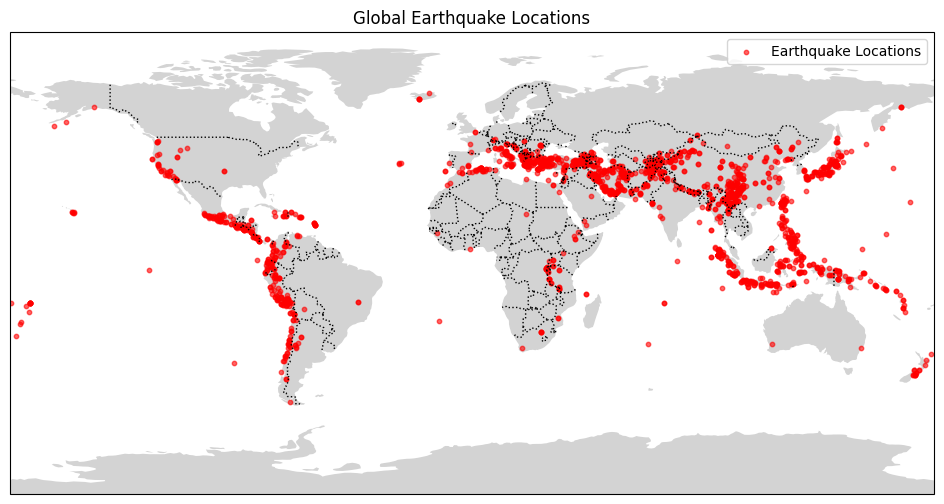

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the cleaned earthquake dataset
file_path = "Datasets/Earthquake.csv"  # Make sure the file path is correct
earthquake_df = pd.read_csv(file_path)

# Convert Latitude and Longitude to numeric (if not already done)
earthquake_df["Latitude"] = pd.to_numeric(earthquake_df["Latitude"], errors="coerce")
earthquake_df["Longitude"] = pd.to_numeric(earthquake_df["Longitude"], errors="coerce")

# Drop missing values
earthquake_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Create a world map with earthquake locations
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# Plot earthquake locations as red dots
ax.scatter(
    earthquake_df["Longitude"],
    earthquake_df["Latitude"],
    color="red",
    alpha=0.6,
    s=10,
    transform=ccrs.PlateCarree(),
    label="Earthquake Locations"
)

plt.title("Global Earthquake Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

plt.savefig('EDA/GlobalEarthquakeLocations.png', dpi=300)

##### **World Map Insights:**
1. **Most earthquakes happen along tectonic plate boundaries:**
   - The **Pacific Ring of Fire** (Japan, Indonesia, West Coast of the Americas) is the most active zone.
   - The **Himalayan region** (Nepal, India) and the **Middle East** (Turkey, Iran) also experience frequent quakes.

2. **Some areas have fewer earthquakes:**
   - Regions such as **Central Africa**, **Europe**, and **inland North America** see much less activity because they are far from tectonic plate edges.

3. **A few earthquakes occur in unexpected places:**
   - Some quakes happen away from known fault lines (e.g., central USA, parts of Africa), likely due to deep underground stress.

4. **The Pacific Ring of Fire is the world’s biggest earthquake hotspot:**
   - This area alone accounts for **over 75%** of global earthquakes, often causing strong and destructive events.

#### 2. **Heatmap Visualization:** Earthquake Frequency by Region
A heatmap will help us visualize which areas experience earthquakes most frequently.

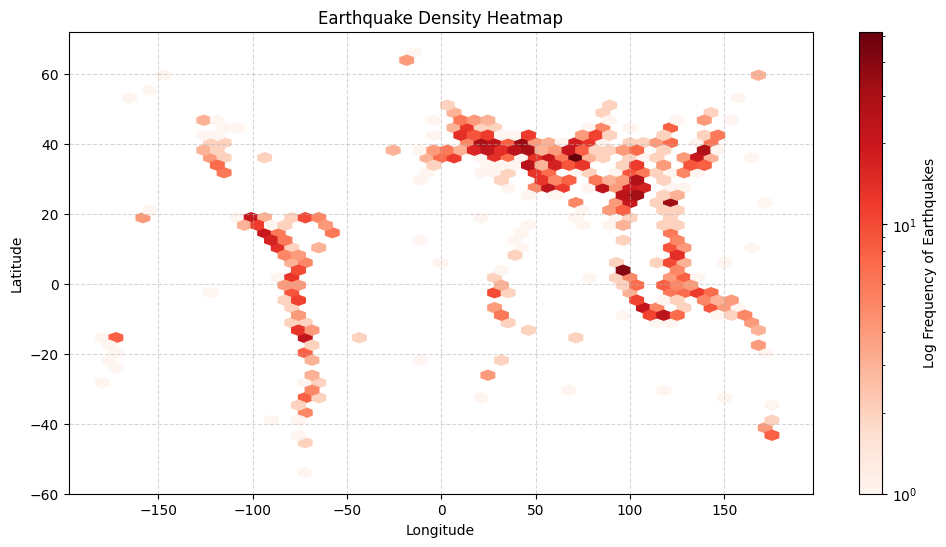

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned earthquake dataset
file_path = "Datasets/Earthquake.csv"  # Ensure the correct file path
earthquake_df = pd.read_csv(file_path)

# Convert Latitude and Longitude to numeric (if not already done)
earthquake_df["Latitude"] = pd.to_numeric(earthquake_df["Latitude"], errors="coerce")
earthquake_df["Longitude"] = pd.to_numeric(earthquake_df["Longitude"], errors="coerce")

# Drop missing values
earthquake_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Generate Earthquake Density Heatmap
plt.figure(figsize=(12, 6))
hb = plt.hexbin(
    earthquake_df["Longitude"],
    earthquake_df["Latitude"],
    gridsize=50,
    cmap="Reds",
    bins="log"
)

plt.colorbar(label="Log Frequency of Earthquakes")
plt.title("Earthquake Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.savefig('EDA/EarthquakeDensity.png', dpi=300)

##### **Heatmap Insights:**

1. **Earthquakes are most frequent along tectonic boundaries:**
   - The **Pacific Ring of Fire** (Japan, Indonesia, West Coast of the Americas) is the most active zone.
   - Other hotspots include the **Himalayas** (Nepal, India) and the **Middle East** (Turkey, Iran).

2. **South America and California show high activity:**
   - Strong earthquake clusters appear along the west coasts of North and South America, following major fault lines.

3. **Asia and the Middle East are also highly active:**
   - The **Himalayan collision zone** and **Turkey-Iran fault systems** contribute to frequent seismic events.

4. **Africa and Europe have lower activity:**
   - Some quakes occur along the **East African Rift**, while **Italy**, **Greece**, and **Turkey** are the most active in Europe.

#### 3. **Time-Series Visualization:** Earthquake Frequency Over Time
A time-series plot will help us analyze how earthquake occurrences have changed over the years.

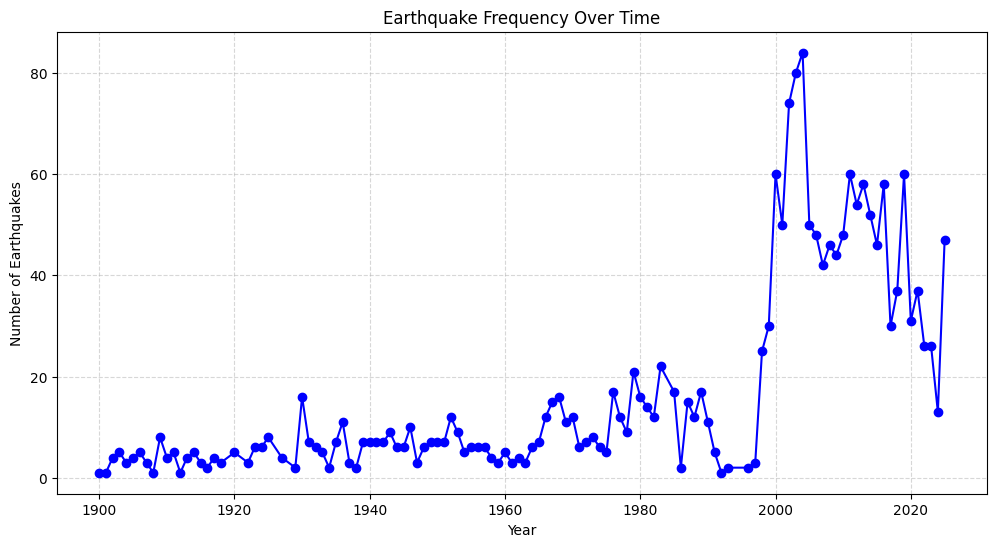

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned earthquake dataset
file_path = "Datasets/Earthquake.csv"  # Ensure the correct file path
earthquake_df = pd.read_csv(file_path)

# Convert 'Start Year' to numeric (ensure proper time-series processing)
earthquake_df["Start Year"] = pd.to_numeric(earthquake_df["Start Year"], errors="coerce")

# Group earthquakes by year to count occurrences
earthquake_trends = earthquake_df["Start Year"].value_counts().sort_index()

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(earthquake_trends.index, earthquake_trends.values, marker="o", linestyle="-", color="blue")
plt.title("Earthquake Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True, linestyle="--", alpha=0.5)

# Save the plot
plt.savefig('EDA/EarthquakeTrends.png', dpi=300)
plt.show()


##### **Time-Series Insights:**

1. **Increase in recorded earthquakes over time**
   - From **1900 to the late 20th century**, earthquake occurrences were relatively stable, with minor fluctuations.
   - A sharp increase after the **1990s** suggests improved seismic monitoring technology, rather than an actual increase in earthquakes.

2. **Significant spike in the early 2000s**
   - A sudden surge in earthquake records around **2000-2010** could indicate major global seismic events or improvements in global data collection.

3. **Recent fluctuations in earthquake occurrences**
   - Although the peak earthquake frequency has dropped slightly after **2010**, activity remains higher than in the early 20th century.

4. **Possible explanations for the trend**
   - The increase in recorded earthquakes is likely due to advancements in detection technology and a greater number of seismic stations worldwide.
   - Climate and geological factors may also contribute, but further analysis is needed to confirm any direct correlations.